# PW4 - Linear Regression
TP fait par : Leo Pellandini, Steven Jaquet et André Quintas Gervasio


## Imports

In [168]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [169]:
datafile = "lausanne-appart.csv"

Read the data

In [170]:
dataset = pd.read_csv(datafile)

Display first rows

In [171]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


## Exercise 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

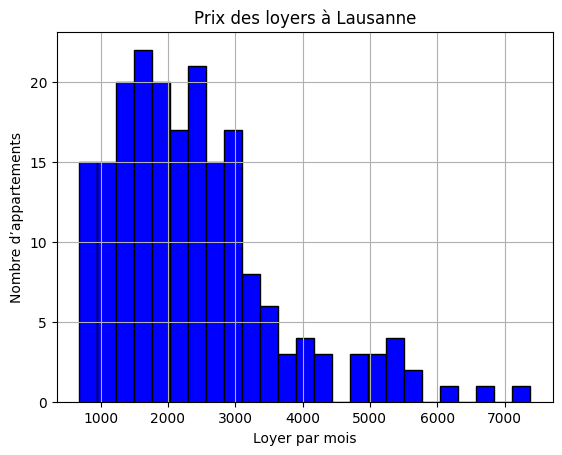

In [172]:
# Your code here
dataset["rent_price"].hist(bins=25, color="blue", edgecolor='black', )

plt.title("Prix des loyers à Lausanne")
plt.xlabel("Loyer par mois")
plt.ylabel("Nombre d’appartements")
plt.show()

b) Plot a histogram to visualize the distribution of the living area

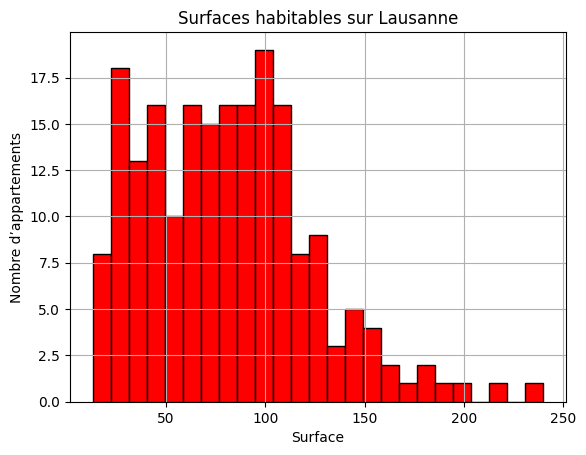

In [173]:
# Your code here
dataset["living_area"].hist(bins=25, color="red", edgecolor="black")

plt.title("Surfaces habitables sur Lausanne")
plt.xlabel("Surface")
plt.ylabel("Nombre d’appartements")
plt.show()

c) Plot a scatter plot of renting price as a function of living area

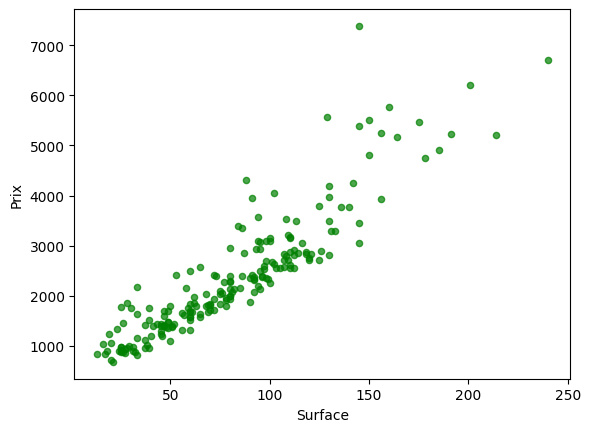

In [174]:
# Your code here
dataset.plot.scatter(x="living_area", y="rent_price", color="green", alpha=0.7)

plt.xlabel("Surface")
plt.ylabel("Prix")
plt.show()

## Exercise 2 - Normal equations for linear regression

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

n_x=201, n_y=201
Intercept : 240.0771072659629
Pente : 26.332424571995677


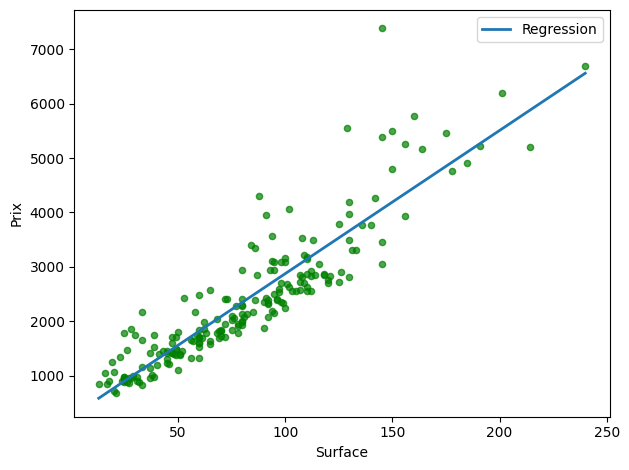

In [175]:
# Your code here
x = dataset["living_area"].to_numpy(dtype=float)
y = dataset["rent_price"].to_numpy(dtype=float)
print(f"n_x={x.size}, n_y={y.size}")

# construction de la matrice features
X = np.c_[np.ones_like(x), x]

# theta = (X^T X)^(-1) X^T y
XT_X = X.T @ X
XT_y = X.T @ y

theta = np.linalg.solve(XT_X, XT_y)
intercept = theta[0]  # terme constant
slope = theta[1]  # pente 

print("Intercept :", intercept)
print("Pente :", slope)

# plot scatter et tracer la ligne de regression
ax = dataset.plot.scatter(x="living_area", y="rent_price", color="green", alpha=0.7)
ax.set_xlabel("Surface")
ax.set_ylabel("Prix")
xs = np.linspace(x.min(), x.max(), 200)
ys = intercept + slope * xs
ax.plot(xs, ys, linewidth=2, label="Regression")

ax.legend()
plt.tight_layout()
plt.show()


b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [176]:
# hθ(x) - fonction
def predict(x, intercept, slope):
    return intercept + slope * x


# prédire :
y_pred = predict(x, intercept, slope)

# nb d'exemples
N = len(y)

# calcule du coût
# J(θ) = 1/(2N) * Somme(hθ(x) - y)^2
cost = (1 / (2 * N)) * np.sum((y_pred - y) ** 2)

print(f"Cost J(theta) = {cost}")

Cost J(theta) = 138034.95779787414


## Exercise 3 - Gradient descent for linear regression

Implement the _full batch_ gradient descent algorithm for the previous problem. As seen in the
theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{0} \leftarrow \theta_{0} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})$</center></div><div style="display: table-cell; width: 100%;">$(6)$</div></div>

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{1} \leftarrow \theta_{1} - \alpha \frac{1}{N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,1}$</center></div><div style="display: table-cell; width: 100%;">$(7)$</div></div>

**Remark** You need to iterate several times over the training set. If you have problems of convergence, you need to use a smaller value of $\alpha$. Values such as $0.000001$ are common.

In [177]:
# Your code here
#predict(...) fait plus haut

def cost(x, y, theta0, theta1):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y
    return 0.5 * np.mean(err ** 2)


#    grad_θ0 = (1/N) * Somme(hθ(x) - y)
#    grad_θ1 = (1/N) * Somme(hθ(x) - y) * x
def full_batch_step(x, y, theta0, theta1, alpha):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y

    # de la fonction mathématique ci-dessus on comprend qu'il faut en effet faire les moyennes des erreurs
    grad_theta0 = np.mean(err)
    grad_theta1 = np.mean(err * x)

    # un pas de taille alpha vers le gradient
    theta0 = theta0 - alpha * grad_theta0
    theta1 = theta1 - alpha * grad_theta1
    return theta0, theta1


# boucle gradient descent
def gradient_descent(x, y, epochs=10000, alpha=0.000001):
    # params de la fonction finale
    theta0, theta1 = 0.0, 0.0
    perte = []

    for epoch in range(epochs):
        # full batch => loop à travers tous les samples
        theta0, theta1 = full_batch_step(x, y, theta0, theta1, alpha)
        j = cost(x, y, theta0, theta1)
        perte.append(j)
        print(f"epoch {epoch + 1}/{epochs} - cost: {j} - theta0={theta0}, theta1={theta1}")

    return theta0, theta1, perte

a) Plot the cost value (Equation 2) as a function of the iterations. What do you observe?

epoch 1/500 - cost: 3527645.4775350015 - theta0=0.0023782437810945275, theta1=0.24012633333333333
epoch 2/500 - cost: 3471179.1239961954 - theta0=0.004736987164610282, theta1=0.4782405195201903
epoch 3/500 - cost: 3415655.1272361227 - theta0=0.007076393554393819, theta1=0.7143594193843473
epoch 4/500 - cost: 3361057.7604319253 - theta0=0.009396624985046176, theta1=0.9484997524639998
epoch 5/500 - cost: 3307371.5592228672 - theta0=0.01169784213339649, theta1=1.1806780981956673
epoch 6/500 - cost: 3254581.3173301443 - theta0=0.013980204329879474, theta1=1.4109108970881785
epoch 7/500 - cost: 3202672.082249809 - theta0=0.016243869569817552, theta1=1.639214451886818
epoch 8/500 - cost: 3151629.151017564 - theta0=0.018488994524608456, theta1=1.8656049287277177
epoch 9/500 - cost: 3101438.066044236 - theta0=0.020715734552819078, theta1=2.090098358282577
epoch 10/500 - cost: 3052084.611020763 - theta0=0.022924243711186367, theta1=2.3127106368937898
epoch 11/500 - cost: 3003554.8068915056 - th

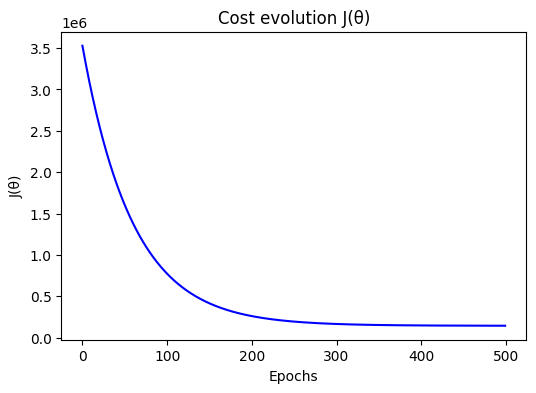

In [178]:
# Your code here
theta0, theta1, losses = gradient_descent(x, y, epochs=500, alpha=0.000001)

plt.figure(figsize=(6, 4))
plt.plot(range(len(losses)), losses, color="blue")
plt.title("Cost evolution J(θ)")
plt.xlabel("Epochs")
plt.ylabel("J(θ)")
plt.show()

On voit que le cout diminue après les itérations et qu'il converge vers une solution optimale autour de l'epoch 400.

b) Imagine a stopping criterion, i.e. when do we stop iterating on the training set?

On peut stoper la descente de gradient quand on a atteint un nombre maximum d’itérations prévu au départ.
Sinon on peut aussi s’arrêter plus tôt si le coût global ne change presque plus entre deux étapes.
Un autre signe d’arrêt est quand le gradient devient très petit, ce qui veut dire que les paramètres bougent à peine et que l’algorithme n’apprend plus vraiment.
Aussi si on suit l’erreur sur un jeu de validation et qu’elle commence à augmenter ou ne s’améliore plus, on peut stopper pour éviter l'overfitting.

c) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

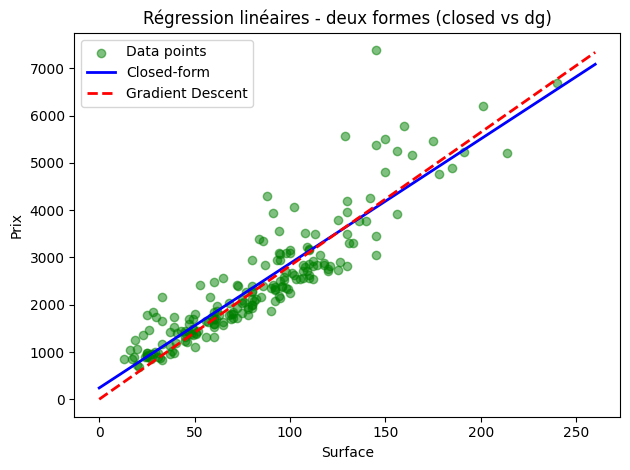

In [179]:
# Nouvelles variables
x_values = np.array(np.linspace(0, np.max(X) + 20, 200))

# closed form
h_theta_values = predict(x_values, intercept, slope)

# avec gradient descent
y_gd = theta0 + theta1 * x_values

plt.xlabel("Surface")
plt.ylabel("Prix")
plt.scatter(x, y, color="green", alpha=0.5, label="Data points")

# the two solutions
plt.plot(x_values, h_theta_values, color="blue", linewidth=2, label="Closed-form")
plt.plot(x_values, y_gd, color="red", linestyle="--", linewidth=2, label="Gradient Descent")

plt.legend()
plt.title("Régression linéaires - deux formes (closed vs dg)")
plt.tight_layout()
plt.show()

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2. What can you conclude?

In [180]:
# Your code here
final_loss = losses[-1]
print(f"Perte finale : {final_loss}")

Perte finale : 144922.8515194854


Avant nous avions : Cost J(theta) = 138034.95779787414

Nous concluons que le gradient n’a pas encore complètement convergé vers le minimum global, même s’il s’en approche. Il faut potentiellement ajuster le nombre d’epochs et choisir un meilleur learning rate afin d’obtenir une solution plus précise. Malgré cette marge de progression, c'était prévu d'avoir un résultat moins optimal, car la méthode en closed form correspond à la formule mathématique qui minimise effectivement les erreurs.

## Exercise 4 - Stochastic gradient descent for linear regression

Implement the stochastic gradient descent algorithm for the previous problem. As seen in the theory, the update rules are:

<div><div style="display: table-cell; width: 100%;"><center>$\theta_{i} \leftarrow \theta_{i} - \alpha (h_{\theta}(\mathbf{x}_{n}) - y_{n}) x_{n,i}$</center></div><div style="display: table-cell; width: 100%;">$(8)$</div></div>

In [181]:
learning_rate = 0.000001
max_iterations = 1000
record_every = 50


# J(θ) = (1 / (2m)) * Σ (hθ(xᵢ) - yᵢ)²
# fonction de coût pour tous les points car compliqué 
# à comprendre convergence si on affiche le plot de l'erreur comis par 
# le pas
def compute_cost(x_data, y_data, t0, t1):
    y_pred_on_all = predict(x_data, t0, t1)
    erreur = y_pred_on_all - y_data
    cost = np.mean(erreur ** 2) / 2
    return cost


# intercept
theta0_stoch = 0.0

# la pente
theta1_stoch = 0.0

# le coût et l'itération l'ayant produit 
costs = []
iterations = []

compteur = 0
while compteur < max_iterations:
    # choisir un point random
    point = np.random.randint(0, len(x))

    val_x = x[point]
    val_y = y[point]

    # erreur du sample choisi
    estimation = theta0_stoch + theta1_stoch * val_x
    err = estimation - val_y

    # mise à jour à partir de 1 seul sample
    correction0 = learning_rate * err
    correction1 = learning_rate * err * val_x
    theta0_stoch = theta0_stoch - correction0
    theta1_stoch = theta1_stoch - correction1

    # sauvegarde des coûts que à certains points
    if (compteur + 1) % record_every == 0:
        cout_actuel = compute_cost(x, y, theta0_stoch, theta1_stoch)
        print("for iteration " + str(compteur) + ", cost = " + str(cout_actuel))
        costs.append(cout_actuel)
        iterations.append(compteur + 1)

    compteur += 1

for iteration 49, cost = 1660129.686850831
for iteration 99, cost = 636885.9014758656
for iteration 149, cost = 376862.05256722803
for iteration 199, cost = 222413.67295255265
for iteration 249, cost = 177064.4560063705
for iteration 299, cost = 162328.95207619292
for iteration 349, cost = 150762.3855105575
for iteration 399, cost = 146398.76325627725
for iteration 449, cost = 145622.2326678261
for iteration 499, cost = 145027.34566921377
for iteration 549, cost = 144177.09458840676
for iteration 599, cost = 144208.06608781367
for iteration 649, cost = 144418.56553630688
for iteration 699, cost = 144205.51294658316
for iteration 749, cost = 144625.58973106707
for iteration 799, cost = 145689.46495091796
for iteration 849, cost = 144161.37453350495
for iteration 899, cost = 146122.72776136058
for iteration 949, cost = 146839.26564786065
for iteration 999, cost = 144414.1512734685


a) Plot the computed line $h_{\theta}(\mathbf{x})$ on top of the scatter plot of exercise 1.

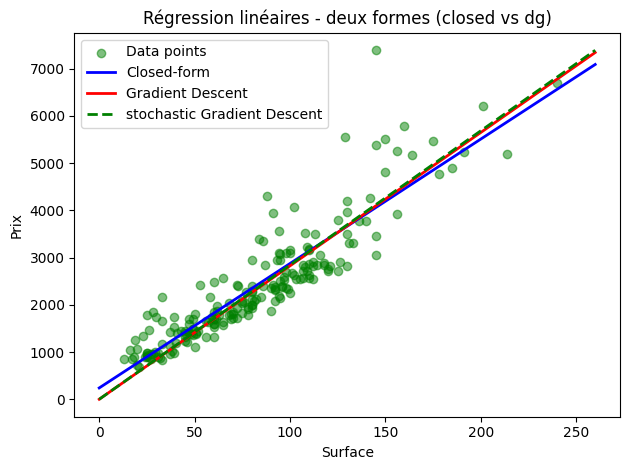

In [182]:
# la nouvelle version => stochastic
y_stoch = theta0_stoch + theta1_stoch * x_values

plt.xlabel("Surface")
plt.ylabel("Prix")
plt.scatter(x, y, color="green", alpha=0.5, label="Data points")

# the two solutions
plt.plot(x_values, h_theta_values, color="blue", linewidth=2, label="Closed-form")
plt.plot(x_values, y_gd, color="red", linewidth=2, label="Gradient Descent")
plt.plot(x_values, y_stoch, color="green", linestyle="--", linewidth=2, label="stochastic Gradient Descent")

plt.legend()
plt.title("Régression linéaires - deux formes (closed vs dg)")
plt.tight_layout()
plt.show()

b) How many samples do you need to visit for reaching the convergence?

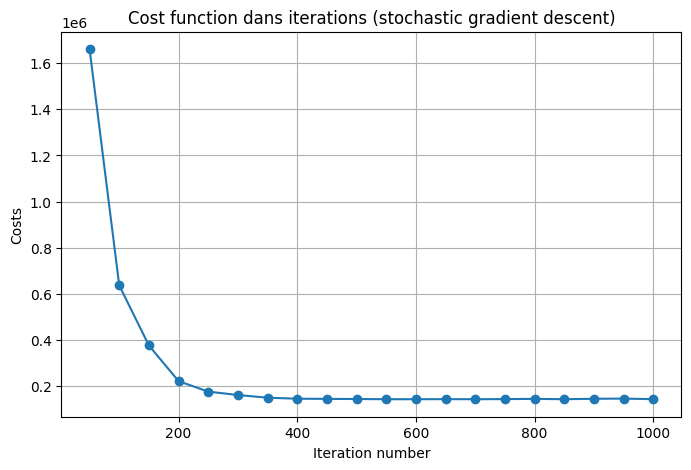

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(iterations, costs, marker='o')
plt.xlabel("Iteration number")
plt.ylabel("Costs")
plt.title("Cost function dans iterations (stochastic gradient descent)")
plt.grid(True)
plt.show()

On remarque que la convergence est atteinte autour de l’itération 600, soit quasiment la même chose qu’en full batch.
À noter que, pour une visualisation plus pertinente, le coût affiché correspond à celui calculé sur l’ensemble du dataset, même si les mises à jour des thetas sont faites de manière stochastics.

Le dernier coût obtenu est de 145715, tandis que celui de l’itération précédente était de 145665, ce qui illustre bien à quel point la loss peut osciller avec un modèle entraîné en stochastic gradient descent (SGD).

c) What kind of stopping criterion could we use here?

Plusieurs façons de définir le critère de stoppage existent :

- Les oscillations de la loss sont normales dans un modèle utilisant la descente stochastique. Cependant, il est tout de même possible de suivre l’évolution de la loss et celle des paramètres thetas. On peut définir le critère de stoppage comme le moment où la meilleure valeur obtenue n’a pas été améliorée depuis un certain nombre d’itérations (par exemple 50). Que ce soit pour l'évolution de la loss ou des paramètres.
- Une bonne idée est de suivre la loss calculée à travers tout le dataset, comme cela a été fait, pour relativiser les erreurs et ainsi avoir des résultats plus fiables.
- Finalement, il serait possible de lier les loss aux paramètres thetas et à la fin choisir les paramètres produisant le coût le plus réduit.

d) Compute the final cost value according to Equation 2 and compare it to the one of exercise 2 and 3. What can you conclude?

Déjà calculé.

Les erreurs sont :
- Closed Form : 138'034
- Full batch :  144'922
- Stochastic : 145'715

On conclut principalement deux choses :

- La version en GD, étant plus légère en computing, notamment lorsque le problème est plus complèxe que celui actuel, produit des résultats assez proches de closed form. En effet, les méthodes basées sur la descente de gradient obtiennent des loss plus élevées, ce qui est normal car elles reposent sur une approximation itérative.
- La version stochastic est encore plus légère que la full batch et produit un résultat assez proche. Cependant, il faut faire attention aux oscillations de la loss.

## Exercise 5 - Review questions

a) The linear regression has a mathematical _closed form_ solution. Then, in which conditions would we prefer a gradient descent algorithm to compute the regression model?

On préfère la descente de gradient quand les données sont très volumineuses ou quand il y a beaucoup de variables. Dans ces cas, la solution en forme fermée (inversion de matrice) devient coûteuse et difficile à gérer. Elle est également plus adaptée aux problèmes plus complexes.

b) Outliers in a data set can be defined as values that are out of the "usual" range in comparison with other values. They typically come from noise or anomalies in the data capturing process. What is the impact of an outlier in the stochastic gradient descent process? What if we have many outliers? _Hint_: look at the equation of the MSE, and to the equation of the update rule.

Ces valeurs aberrantes perturbent la descente de gradient, car elles amplifient l’erreur quadratique, qui est l’élément principal de mise à jour des paramètres. Cela est d’autant plus problématique dans une descente stochastique, puisque la loss est calculée à partir d’un seul échantillon. Si celui-ci est une valeur aberrante, il y a de grands risques que cela perturbe le modèle. Par exemple si la dernière epoch le modèle tombe sur une sample abérrante, alors les résultats seront influencés.

S’il y a trop d’outliers, le modèle n’arrivera pas à converger correctement vers la meilleure solution, car il sera très souvent induit en erreur par ces valeurs extrêmes.

c) In the case of stochastic gradient descent, what is the danger of having a too large or too small $\alpha$ value? Could you think of a better (more advanced) strategy as the one stated in Slide 36?

- Un LR trop large peut produire des oscillations encore plus importantes. Il amplifie l'effet produit par la loss d'une seule sample. Finalement, cela peut même causer une divergence.
- Un LR trop petit demandera beaucoup de samples pour converger => trop lent pour trouver bonne solution.

Une meilleure alternative serait d'utiliser un LR dynamique, c'est à dire qui évolue en fonction des epochs. Par exemple on peut réduire progressivement alpha si on s'approche du minimum. Ceci est fait par exemple avec Adam optimizer. Autrement, on peut utiliser un param de momentum, qui permettrait d’accumuler une partie des gradients précédents pour "smoother" les mises à jour et réduire les oscillations.


d) Let's assume we expect that the target variable $y$ has a dependency to the square and to the cube of one of the feature $x_d$ in our multi-variable training set $(x_1, \ldots, x_d, \ldots, x_D)$. How would you proceed? Do we need to take precautions in terms of numerical stability?

On aurait deux nouvelles variables, x au carré et au cube puis poursuivre l'entraînement comme d'habitude. Cependant, il faut rester attentif à la stabilité numérique, car ces transformations peuvent générer des valeurs très grandes. On pourrait donc normaliser ou standardiser les données avant d’ajouter ces termes afin d’éviter les problèmes de convergence ou de perte de précision.



e) _Advanced_. Could we use a descent algorithm without computing the gradient? If yes, give a pseudo code of the algorithm to find $(\theta_{0}, \theta_{1})$ using a linear regression $h_{\theta}(x) = \theta_0 + \theta_1 x$.

Ce serait possible sans DG par exemple avec un algorithme génétique. Il consiste à générer une population de couples theta0 et theta à évaluer leur performance (mesurée par l'erreur, comme p.ex MSE), puis à faire évoluer cette population par sélection, croisement et mutation jusqu’à trouver les paramètres minimisant la fonction de coût.

Pseudo code (inspiré de https://www.datacamp.com/tutorial/genetic-algorithm-python):

Start randomly parameters couples:
    each couple for example = (theta0, theta1) // randomly


Repeat until satisfied with results : 

    1. calculate fitness (ou performance)
        fitness(i) = -J(theta0, theta1) # J being error, as before

    2. Select top X% couples => parents

    3. Reproduction :
            - Combine selected parents (mean values, random, etc.)
            - Apply small variation:
                theta_i' = theta_i + petite_variation


    4. create new population :
        -> mutant children + some of the best parents for example

    5. repeat

# Optionnal - Exercice 6 Mini Batch

In [184]:
theta_0_mini = 0
theta_1_mini = 0

# new params for mini batch
alpha = 0.000001
epochs = 600
B = 32  # batch size 


# same code as before with just mini_batch_gradient_descent changed
def cost(x, y, theta0, theta1):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y
    return 0.5 * np.mean(err ** 2)


#    grad_θ0 = (1/N) * Somme(hθ(x) - y)
#    grad_θ1 = (1/N) * Somme(hθ(x) - y) * x
def mini_batch_step(x, y, theta0, theta1, alpha):
    y_pred = predict(x, theta0, theta1)
    err = y_pred - y

    # de la fonction mathématique ci-dessus on comprend qu'il faut en effet faire les moyennes des erreurs
    grad_theta0 = np.mean(err)
    grad_theta1 = np.mean(err * x)

    # un pas de taille alpha vers le gradient
    theta0 = theta0 - alpha * grad_theta0
    theta1 = theta1 - alpha * grad_theta1
    return theta0, theta1


# boucle gradient descent
def mini_batch_gradient_descent(x, y, epochs=10000, alpha=0.000001, batch_size=32):
    theta0, theta1 = 0.0, 0.0
    perte = []
    m = len(x)

    for epoch in range(epochs):
        # shuffle to get the mini batch randomly
        indices = np.arange(m)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        # use only the batched
        for start in range(0, m, batch_size):
            end = start + batch_size
            x_batch = x_shuffled[start:end]
            y_batch = y_shuffled[start:end]

            # Compute one step 
            theta0, theta1 = mini_batch_step(x_batch, y_batch, theta0, theta1, alpha)

        # compute loss over full ds
        j = cost(x, y, theta0, theta1)
        perte.append(j)

        # log every 50 
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"epoch nb :  {epoch + 1}/{epochs} | Cost: {j} | theta0={theta0} | theta1={theta1}")

    return theta0, theta1, perte


theta0, theta1, losses = mini_batch_gradient_descent(x, y, epochs=epochs, alpha=alpha, batch_size=B)

epoch nb :  1/600 | Cost: 3200385.4387957463 | theta0=0.016237614310144387 | theta1=1.6493168426066782
epoch nb :  50/600 | Cost: 153421.7194268463 | theta0=0.28183544580395853 | theta1=27.16956281912201
epoch nb :  100/600 | Cost: 144218.25903657873 | theta0=0.3130353969935657 | theta1=28.538062935868503
epoch nb :  150/600 | Cost: 144162.36505199334 | theta0=0.33248597959489606 | theta1=28.68416860575547
epoch nb :  200/600 | Cost: 144159.16107310372 | theta0=0.349859056263145 | theta1=28.639790820095595
epoch nb :  250/600 | Cost: 144180.78953302975 | theta0=0.3670882522958363 | theta1=28.580481321605102
epoch nb :  300/600 | Cost: 144157.4570418794 | theta0=0.3857056600130039 | theta1=28.638514193768607
epoch nb :  350/600 | Cost: 144160.3737238807 | theta0=0.403233350264468 | theta1=28.62060684469008
epoch nb :  400/600 | Cost: 144155.39136910895 | theta0=0.42226601475529607 | theta1=28.670244255541057
epoch nb :  450/600 | Cost: 144176.2012631415 | theta0=0.44062834076247076 | th

# Optionnal - Exercice 7 Multi variable



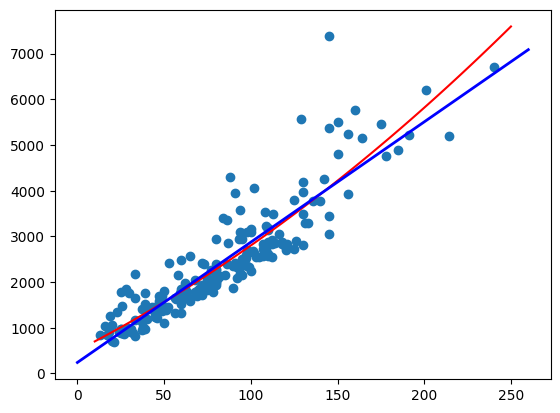

Loss : 133724.80783730198
         2
0.03592 x + 19.38 x + 503.5


In [185]:
# random x for plotting
x_plot = np.linspace(10, 250, 100)

# fits a 2nd-degree polynom using square of living arrea 
coeffs_poly2 = np.polyfit(x, y, 2)

# ccreate the poly function
model_poly2 = np.poly1d(coeffs_poly2)

#predict
y_pred_poly2 = model_poly2(x_plot)

plt.scatter(x, y, label='raw data points')
plt.plot(x_plot, y_pred_poly2, color='red', label='Regression')
plt.plot(x_values, h_theta_values, color="blue", linewidth=2, label="Closed-form")

plt.show()

# print loss - training data points
y_pred_poly2 = model_poly2(x)
loss_poly2 = 0.5 * np.mean((y - y_pred_poly2) ** 2)
print(f"Loss : {loss_poly2}")
print(model_poly2)


Visuellement, nous observons une amélioration de la courbe. En effet cette dernière semble mieux fit les données. La loss est également plus basse avec un résultat de 133'725. Il y a donc une amélioration du model en exploitant ce poly de deuxième degré.

Partie b) avec les deux features

In [199]:
# adapted but accepting now multiple features
def cost(X, y, theta):
    y_pred = X.dot(theta)
    err = y_pred - y
    return 0.5 * np.mean(err ** 2)


# adapted for more than 1 theta
def mini_batch_step(Xb, yb, theta, alpha):
    y_pred = Xb.dot(theta)
    err = y_pred - yb

    # mean gradient, for all of the 
    grad = Xb.T.dot(err) / len(yb)

    # update params
    theta = theta - alpha * grad
    return theta


def mini_batch_gd_2features(X, y, epochs=1000, alpha=0.000001, batch_size=32):
    # multiple parameters accepted now
    theta = np.zeros(X.shape[1])
    perte = []
    m = len(y)

    # for each epoch
    for epoch in range(epochs):
        # mix for mini batch
        indices = np.arange(m)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # loop mini batch
        for start in range(0, m, batch_size):
            end = start + batch_size
            Xb = X_shuffled[start:end]
            yb = y_shuffled[start:end]

            # update weights
            theta = mini_batch_step(Xb, yb, theta, alpha)

        # calculate loss
        j = cost(X, y, theta)
        perte.append(j)

        # show some logs
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"epoch {epoch + 1}/{epochs} | Cost: {j:.4f} | theta={theta}")

    return theta, perte

In [205]:
# Vars
epochs = 200
alpha = 0.00001
x1 = dataset["living_area"].values
x2 = dataset["nb_rooms"].values
y = dataset["rent_price"].values

# feature matrix - first is ones 
X = np.column_stack((np.ones(len(x1)), x1, x2))

# three thetas again
theta = np.zeros(3)

# training of the model
theta_final, losses = mini_batch_gd_2features(X, y, epochs=epochs, alpha=alpha, batch_size=B)

print("Final parameters:", theta_final)
print("Final loss:", losses[-1])

epoch 1/200 | Cost: 1174483.5113 | theta=[ 0.13080043 12.95804897  0.47476456]
epoch 50/200 | Cost: 144429.7660 | theta=[ 0.45987049 28.87471954  1.05619961]
epoch 100/200 | Cost: 144174.3869 | theta=[ 0.63428966 28.70435922  1.05782168]
epoch 150/200 | Cost: 144133.9456 | theta=[ 0.8164312  28.58559905  1.06912822]
epoch 200/200 | Cost: 144350.5937 | theta=[ 0.98429892 28.37704009  1.06908024]
Final parameters: [ 0.98429892 28.37704009  1.06908024]
Final loss: 144350.5936815965


La loss finale n'est pas forcément meilleure avec cette deuxième feature.